### Next steps:

1) do one-hot encoding with the job titles. Create a new column with job title/industry id 

2) Once we get this, we'll be able to group by ids, and not job titles

In [91]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np
from itertools import cycle, islice

In [2]:
db = '../employment_data.db'
conn = sql.connect(db)

In [3]:
df = pd.read_sql_query("SELECT * FROM employment_data;", conn)

In [6]:
df

,title,company_name,location,via,job_category,location_category,description,schedule_type,job_id
0,Software Engineer - All levels,Bubble,"New York, NY",via AngelList,software engineer,new york city,"For 95% of programming jobs, the primary focus...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
1,"Software Engineer - Apple Media Products, Core...",Apple,"New York, NY",via Careers At Apple,software engineer,new york city,"Summary\nPosted: May 24, 2021\n\nRole Number:2...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
2,Software Engineer,Robinhood,"New York, NY",via LinkedIn,software engineer,new york city,Join a leading fintech company that’s democrat...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
3,Software Engineer III,Google,"New York, NY (+1 other)",via LinkedIn,software engineer,new york city,Note: By applying to this position you will ha...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciBJSU...
4,Software Engineer,Capital One,"New York, NY",via Capital One Careers,software engineer,new york city,"Locations: NY - New York, United States of Ame...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
...,...,...,...,...,...,...,...,...,...
7333,UX Designer-Remote,"PDS Tech, Inc.","Atlanta, GA",via TopTechJobs,UI/UX designer,atlanta georgia,You need to be highly collaborative and able t...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lci1SZW1vdGUiLC...
7334,UX Designer,Jobleads,"Atlanta, GA",via Jobilize,UI/UX designer,atlanta georgia,Welcome to the Anthem Careers site! We have be...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lciIsImNvbXBhbn...
7335,Senior UI Creative Designer,Capgemini,"Atlanta, GA",via ZipRecruiter,UI/UX designer,atlanta georgia,Capgemini is a looking for a Senior UI / Creat...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVUkgQ3JlYXRpdmUgRG...
7336,"Senior UX Designer, Digital Transformation - R...",IHS Markit,"Atlanta, GA",via IHS Markit,UI/UX designer,atlanta georgia,Position Summary\n\nAs a key player in the dig...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVVggRGVzaWduZXIsIE...


In [7]:
conn.close()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7338 entries, 0 to 7337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              7338 non-null   object
 1   company_name       7338 non-null   object
 2   location           7338 non-null   object
 3   via                7338 non-null   object
 4   job_category       7338 non-null   object
 5   location_category  7338 non-null   object
 6   description        7338 non-null   object
 7   schedule_type      7288 non-null   object
 8   job_id             7338 non-null   object
dtypes: object(9)
memory usage: 258.0+ KB


In [29]:
df['description'] = df['description'].str.replace('\n', ' ')

In [30]:
df

,title,company_name,location,via,job_category,location_category,description,schedule_type,job_id
0,Software Engineer - All levels,Bubble,"New York, NY",via AngelList,software engineer,new york city,"For 95% of programming jobs, the primary focus...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
1,"Software Engineer - Apple Media Products, Core...",Apple,"New York, NY",via Careers At Apple,software engineer,new york city,"Summary Posted: May 24, 2021 Role Number:2002...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
2,Software Engineer,Robinhood,"New York, NY",via LinkedIn,software engineer,new york city,Join a leading fintech company that’s democrat...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
3,Software Engineer III,Google,"New York, NY (+1 other)",via LinkedIn,software engineer,new york city,Note: By applying to this position you will ha...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciBJSU...
4,Software Engineer,Capital One,"New York, NY",via Capital One Careers,software engineer,new york city,"Locations: NY - New York, United States of Ame...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
...,...,...,...,...,...,...,...,...,...
7333,UX Designer-Remote,"PDS Tech, Inc.","Atlanta, GA",via TopTechJobs,UI/UX designer,atlanta georgia,You need to be highly collaborative and able t...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lci1SZW1vdGUiLC...
7334,UX Designer,Jobleads,"Atlanta, GA",via Jobilize,UI/UX designer,atlanta georgia,Welcome to the Anthem Careers site! We have be...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lciIsImNvbXBhbn...
7335,Senior UI Creative Designer,Capgemini,"Atlanta, GA",via ZipRecruiter,UI/UX designer,atlanta georgia,Capgemini is a looking for a Senior UI / Creat...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVUkgQ3JlYXRpdmUgRG...
7336,"Senior UX Designer, Digital Transformation - R...",IHS Markit,"Atlanta, GA",via IHS Markit,UI/UX designer,atlanta georgia,Position Summary As a key player in the digit...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVVggRGVzaWduZXIsIE...


In [27]:
a = df.groupby(['location_category','job_category']).count()
a

title  company_name  location  \
location_category      job_category                                         
atlanta georgia        UI/UX designer         168           168       168   
                       back-end developer     279           279       279   
                       data analyst           324           324       324   
                       data scientist         254           254       254   
                       front-end developer    450           450       450   
                       software engineer      377           377       377   
                       web developer          283           283       283   
los angeles california UI/UX designer         211           211       211   
                       back-end developer     156           156       156   
                       data analyst           234           234       234   
                       data scientist         193           193       193   
                       front-end developer    380           380       380   
                       software engineer      337           337       337   
                       web developer          201           201       201   
new york city          UI/UX designer         396           396       396   
                       back-end developer     264           264       264   
                       data analyst           436           436       436   
                       data scientist         420           420       420   
                       front-end developer    739           739       739   
                       software engineer      480           480       480   
                       web developer          257           257       257   
newark new jersey      UI/UX designer          36            36        36   
                       back-end developer      39            39        39   
                       data analyst            75            75        75   
                       data scientist          40            40        40   
                       front-end developer     79            79        79   
                       software engineer      183           183       183   
                       web developer           47            47        47   

                                            via  description  schedule_type  \
location_category      job_category                                           
atlanta georgia        UI/UX designer       168          168            168   
                       back-end developer   279          279            279   
                       data analyst         324          324            320   
                       data scientist       254          254            253   
                       front-end developer  450          450            449   
                       software engineer    377          377            375   
                       web developer        283          283            278   
los angeles california UI/UX designer       211          211            208   
                       back-end developer   156          156            155   
                       data analyst         234          234            233   
                       data scientist       193          193            193   
                       front-end developer  380          380            378   
                       software engineer    337          337            336   
                       web developer        201          201            198   
new york city          UI/UX designer       396          396            389   
                       back-end developer   264          264            264   
                       data analyst         436          436            432   
                       data scientist       420          420            420   
                       front-end developer  739          739            735   
                       software engineer    480          480            48

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9097 entries, 0 to 9096
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          9097 non-null   object
 1   company_name   9097 non-null   object
 2   location       9097 non-null   object
 3   via            9097 non-null   object
 4   description    9097 non-null   object
 5   schedule_type  9027 non-null   object
 6   job_id         9097 non-null   object
dtypes: object(7)
memory usage: 248.8+ KB


# Reading csv as a dataframe

In [8]:
df_new = pd.read_csv('updated_categories_employment_data.csv') 

In [118]:
df_new

,title,company_name,location,via,job_category,location_category,description,schedule_type,job_id,lowercase_title,lowercase_description
0,Software Engineer - All levels,Bubble,"New York, NY",via AngelList,software engineer,new york city,"For 95% of programming jobs, the primary focus...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...,software engineer - all levels,"for 95% of programming jobs, the primary focus..."
1,"Software Engineer - Apple Media Products, Core...",Apple,"New York, NY",via Careers At Apple,software engineer,new york city,"Summary Posted: May 24, 2021 Role Number:2002...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...,"software engineer - apple media products, core...","summary posted: may 24, 2021 role number:2002..."
2,Software Engineer,Robinhood,"New York, NY",via LinkedIn,software engineer,new york city,Join a leading fintech company that’s democrat...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...,software engineer,join a leading fintech company that’s democrat...
3,Software Engineer III,Google,"New York, NY (+1 other)",via LinkedIn,software engineer,new york city,Note: By applying to this position you will ha...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciBJSU...,software engineer iii,note: by applying to this position you will ha...
4,Software Engineer,Capital One,"New York, NY",via Capital One Careers,software engineer,new york city,"Locations: NY - New York, United States of Ame...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...,software engineer,"locations: ny - new york, united states of ame..."
...,...,...,...,...,...,...,...,...,...,...,...
7333,UX Designer-Remote,"PDS Tech, Inc.","Atlanta, GA",via TopTechJobs,UI/UX designer,atlanta georgia,You need to be highly collaborative and able t...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lci1SZW1vdGUiLC...,ux designer-remote,you need to be highly collaborative and able t...
7334,UX Designer,Jobleads,"Atlanta, GA",via Jobilize,UI/UX designer,atlanta georgia,Welcome to the Anthem Careers site! We have be...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lciIsImNvbXBhbn...,ux designer,welcome to the anthem careers site! we have be...
7335,Senior UI Creative Designer,Capgemini,"Atlanta, GA",via ZipRecruiter,UI/UX designer,atlanta georgia,Capgemini is a looking for a Senior UI / Creat...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVUkgQ3JlYXRpdmUgRG...,senior ui creative designer,capgemini is a looking for a senior ui / creat...
7336,"Senior UX Designer, Digital Transformation - R...",IHS Markit,"Atlanta, GA",via IHS Markit,UI/UX designer,atlanta georgia,Position Summary As a key player in the digit...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVVggRGVzaWduZXIsIE...,"senior ux designer, digital transformation - r...",position summary as a key player in the digit...


In [119]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7338 entries, 0 to 7337
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  7338 non-null   object
 1   company_name           7338 non-null   object
 2   location               7322 non-null   object
 3   via                    7338 non-null   object
 4   job_category           7338 non-null   object
 5   location_category      7338 non-null   object
 6   description            7338 non-null   object
 7   schedule_type          7288 non-null   object
 8   job_id                 7338 non-null   object
 9   lowercase_title        7338 non-null   object
 10  lowercase_description  7338 non-null   object
dtypes: object(11)
memory usage: 315.4+ KB


## Converting Title names and Descriptions to lowercase

In [9]:
def lowercase(col):
    return list(map(lambda x: x.lower(), df_new[col]))

df_new['lowercase_title'] = lowercase('title')
df_new['lowercase_description'] = lowercase('description')

In [10]:
df_new['job_category'].unique()

array(['software engineer', 'data analyst', 'web developer',
       'data scientist', 'front-end developer', 'back-end developer',
       'UI/UX designer'], dtype=object)

## Need to create a dictionary with the count of technologies per job title, per city

### Let's do all of the jobs in NY

In [11]:
def job_postings(job_category, location):
    return df_new[(df_new['job_category'] == job_category) & (df_new['location_category'] == location)]

### Getting all job postings for each job title

In [12]:
software_engineer_ny = job_postings('software engineer', 'new york city')
data_analyst_ny = job_postings('data analyst', 'new york city')
web_developer_ny = job_postings('web developer', 'new york city')
data_scientist_ny = job_postings('data scientist', 'new york city')
front_end_developer_ny = job_postings('front-end developer', 'new york city')
back_end_developer_ny = job_postings('back-end developer', 'new york city')
uiux_designer_ny = job_postings('UI/UX designer', 'new york city')

In [101]:
# software_engineer_ny = df_new[(df_new['job_category'] == 'software engineer') & (df_new['location_category'] == 'new york city')]
# software_engineer_ny

In [102]:
# software_engineer_ny['lowercase_description'].values

In [46]:
all_technologies = ['python', 'ruby', 'scala', 'java', 'javascript', 'html', 'css', 'aws', 'node js',
                    'c#', 'c++', 'git', 'github', 'sql', 'mysql', 'postgresql', 'oracle'
                   'linux', 'hadoop',  'scala', 'spark', 'nosql', 'rest apis', 'node.js', 
                   'mongodb', 'docker', 'kubernetes', 'terraform', 'teamcity', 'angular js', 'ides', 'bash'
                   'http', 'react', 'angular', 'vue.js', 'apache cassandra', 'cloud services', 'oop', 'funcitonal programming'
                   'bsa/aml', 'object-oriented programming', 'ssl certificates', 'version control system',
                   'microsoft excel', 'power bi', 'stata', 'sas', 'web intelligence', 'tableau', 'snowflake',
                   'redshift', 'looker', 'braze', 'adobe', 'r programming', 'microsoft office', 'airflow', 'databricks', 'etl', 
                   'machine learning', 'powerpoint', 'matlab', 'apache shark', 'perl', 'statistics', 'matplotlib', 'pandas',
                   'numpy', 'ggplot', 'bokeh', 'flask', 'django', 'd3.js', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp',
                   'meteor', '.net', 'laravel', 'zend', 'yii', 'php', 'elixir', 'express.js', 'figma']

In [22]:
class Jobs:
    def __init__(self):
        self.tech = {}
        
    def append_tech(self, series):
        all_technologies = ['python', 'ruby', 'scala', 'java', 'javascript', 'html', 'css', 'aws', 'node js',
                    'c#', 'c++', 'git', 'github', 'sql', 'mysql', 'postgresql', 'oracle'
                   'linux', 'hadoop',  'scala', 'spark', 'nosql', 'rest apis', 'node.js', 
                   'mongodb', 'docker', 'kubernetes', 'terraform', 'teamcity', 'angular js', 'ides', 'bash'
                   'http', 'react', 'angular', 'vue.js', 'apache cassandra', 'cloud services', 'oop', 'funcitonal programming'
                   'bsa/aml', 'object-oriented programming', 'ssl certificates', 'version control system',
                   'microsoft excel', 'power bi', 'stata', 'sas', 'web intelligence', 'tableau', 'snowflake',
                   'redshift', 'looker', 'braze', 'adobe', 'r programming', 'microsoft office', 'airflow', 'databricks', 'etl', 
                   'machine learning', 'powerpoint', 'matlab', 'apache shark', 'perl', 'statistics', 'matplotlib', 'pandas',
                   'numpy', 'ggplot', 'bokeh', 'flask', 'django', 'd3.js', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp',
                   'meteor', '.net', 'laravel', 'zend', 'yii', 'php', 'elixir', 'express.js', 'figma']
        
        #going through each individual string in the job description column
        for string in series.values:
            for technology in all_technologies:
                if technology in string:
                    self.tech[technology] = self.tech.get(technology, 0) + 1
#                     if tech not in self.tech.keys():
#                         self.tech[tech] = 1
#                     else:
#                         self.tech[tech] += 1

                    

### Getting the dictionary of techologies for our 7 job titles in NY

In [83]:
software_engineerny = Jobs()
software_engineerny.append_tech(software_engineer_ny['lowercase_description'])
software_engineerny.tech

data_analystny = Jobs()
data_analystny.append_tech(data_analyst_ny['lowercase_description'])
data_analystny.tech

data_scientistny = Jobs()
data_scientistny.append_tech(data_scientist_ny['lowercase_description'])
data_scientistny.tech

web_developerny = Jobs()
web_developerny.append_tech(web_developer_ny['lowercase_description'])
web_developerny.tech

frontend_developerny = Jobs()
frontend_developerny.append_tech(front_end_developer_ny['lowercase_description'])
frontend_developerny.tech

backend_developerny = Jobs()
backend_developerny.append_tech(back_end_developer_ny['lowercase_description'])
backend_developerny.tech

uiux_designerny = Jobs()
uiux_designerny.append_tech(uiux_designer_ny['lowercase_description'])
uiux_designerny.tech

{'git': 224,
 'adobe': 163,
 'java': 51,
 'javascript': 51,
 'html': 101,
 'css': 104,
 'scala': 70,
 'figma': 153,
 'ides': 85,
 'react': 22,
 'angular': 6,
 'machine learning': 11,
 'tableau': 9,
 'meteor': 1,
 'oop': 9,
 'python': 4,
 'aws': 27,
 'c#': 2,
 'node.js': 1,
 'cloud services': 5,
 'github': 5,
 'spark': 4,
 'perl': 5,
 '.net': 5,
 'angular js': 1,
 'statistics': 1,
 'power bi': 2,
 'sas': 7,
 'powerpoint': 5,
 'docker': 1,
 'microsoft office': 1,
 'php': 1}

### Converting all technology dictionaries to dataframes to make graphs

In [88]:
tech_software_engineer_ny = pd.DataFrame(list(software_engineerny.tech.items()), columns=['technology', 'frequency'])
tech_data_analyst_ny = pd.DataFrame(list(data_analystny.tech.items()), columns=['technology', 'frequency'])
tech_data_scientist_ny = pd.DataFrame(list(data_scientistny.tech.items()), columns=['technology', 'frequency'])
tech_web_developer_ny = pd.DataFrame(list(web_developerny.tech.items()), columns=['technology', 'frequency'])
tech_frontend_developer_ny = pd.DataFrame(list(frontend_developerny.tech.items()), columns=['technology', 'frequency'])
tech_backend_developer_ny = pd.DataFrame(list(backend_developerny.tech.items()), columns=['technology', 'frequency'])
tech_uiux_developer_ny = pd.DataFrame(list(uiux_designerny.tech.items()), columns=['technology', 'frequency'])

#### Getting the top technologies per role in NY

In [89]:
top_technologies_se = tech_software_engineer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_da = tech_data_analyst_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_ds = tech_data_scientist_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_wb = tech_web_developer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_frtd = tech_frontend_developer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_backd = tech_backend_developer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_uiux = tech_uiux_developer_ny.sort_values(by='frequency', ascending=False).head(10)


### Graph for software engineer role in NY

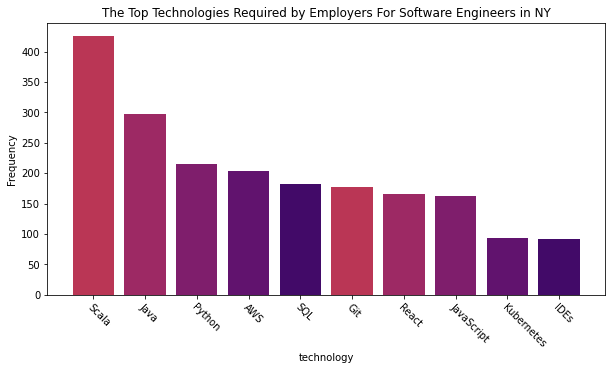

In [90]:
# x = top_technologies_SE['technology']
y = top_technologies_se['frequency']
x = ['Scala', 'Java', 'Python', 'AWS', 'SQL', 'Git', 'React', 'JavaScript', 'Kubernetes', 'IDEs']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies Required by Employers For Software Engineers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Graphing for Data Analyst

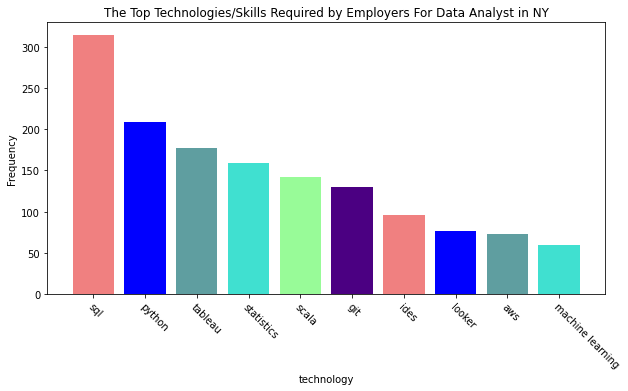

In [104]:
x = top_technologies_da['technology']
y = top_technologies_da['frequency']

# colors = cm.inferno_r(np.linspace(.5, .8, 5))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Data Analyst in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Graphing technologies for data scientists in NY

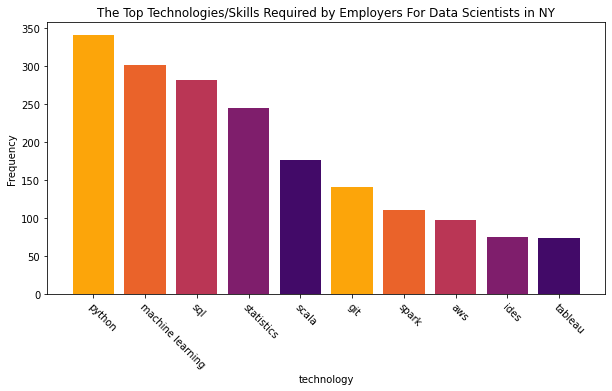

In [111]:
x = top_technologies_ds['technology']
y = top_technologies_ds['frequency']

colors = cm.inferno_r(np.linspace(.2, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Data Scientists in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Graphing technologies for web developers in NY

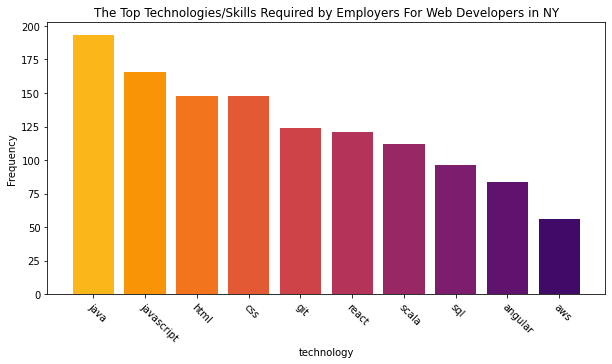

In [119]:
x = top_technologies_wb['technology']
y = top_technologies_wb['frequency']

colors = cm.inferno_r(np.linspace(.167, .8, 10))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Web Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Making graph for technologies for front end developers in NY 

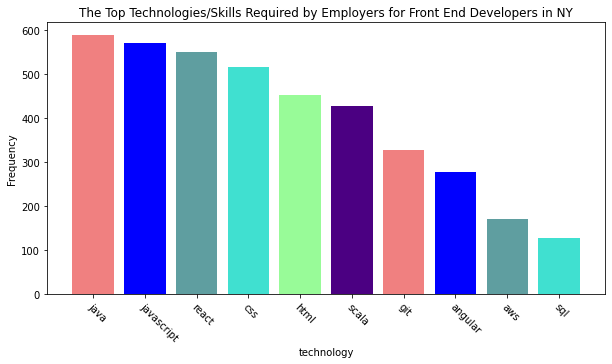

In [123]:
x = top_technologies_frtd['technology']
y = top_technologies_frtd['frequency']

# colors = cm.inferno_r(np.linspace(.167, .8, 10))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for Front End Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Making graph for technologies for back end developers in NY 

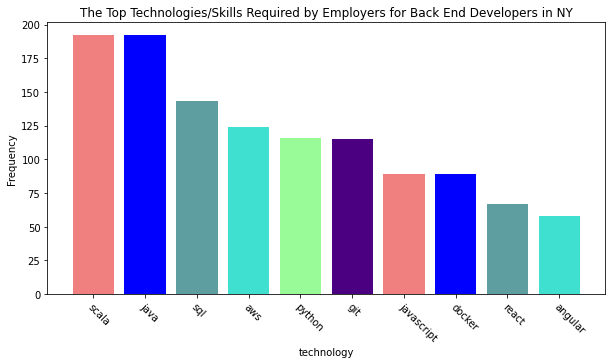

In [125]:
x = top_technologies_backd['technology']
y = top_technologies_backd['frequency']

# colors = cm.inferno_r(np.linspace(.167, .8, 10))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for Back End Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Making graph for technologies for UI/UX developers in NY 

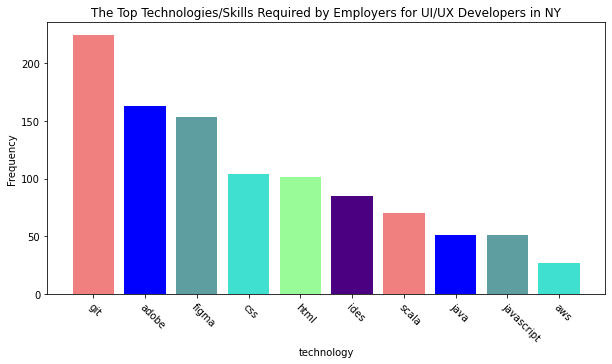

In [126]:
x = top_technologies_uiux['technology']
y = top_technologies_uiux['frequency']

# colors = cm.inferno_r(np.linspace(.167, .8, 10))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for UI/UX Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

#### brainstorming how we were going to take the frequency of the technologies in each description

In [108]:
description = 'css, and another language to know is python, python, python, ruby, and scala'
all_technologies =['python', 'ruby', 'scala']

#check dictionary per role per city
tech = {}
for item in all_technologies:
    if item in description:
        print(f'{item} is here')
        tech[item] = tech.get(item, 0)+1
#         if item not in tech.keys():
#             tech[item] = 1
#         else:
#             tech[item] += 1
print(tech)

python is here
ruby is here
scala is here
{'python': 1, 'ruby': 1, 'scala': 1}
